In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats
plt.style.use('fivethirtyeight')

In [2]:
train_data=pd.read_csv('train_titanic.csv')
test_data=pd.read_csv('test_titanic.csv')

In [3]:

train_data.shape

(891, 12)

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
test_data.head(40)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
test_data.shape

(418, 11)

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

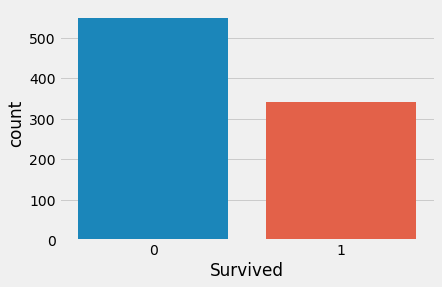

In [9]:
sn.countplot('Survived',data=train_data)#0:death,1:Survive
plt.show()

In [10]:
train_data.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

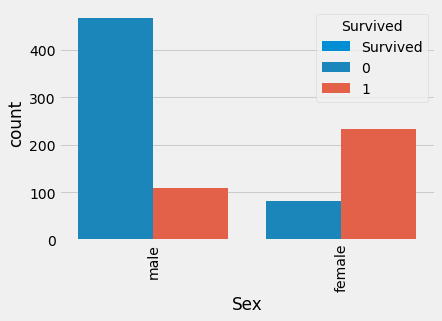

In [11]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sn.countplot('Sex',hue='Survived',data=train_data)
plt.show()

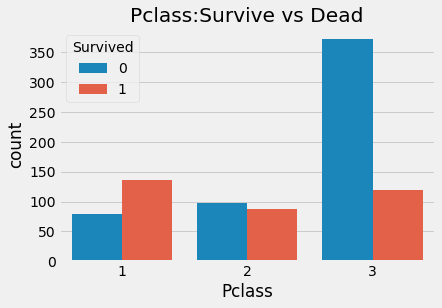

In [12]:
sn.countplot('Pclass',hue='Survived',data=train_data)
plt.title('Pclass:Survive vs Dead')
plt.show()

In [44]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

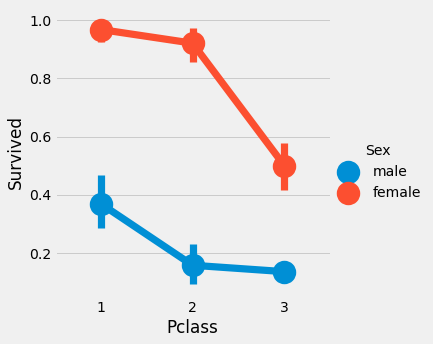

In [14]:
sn.factorplot('Pclass','Survived',hue='Sex',data=train_data)
plt.show()

In [15]:
print('Oldest person Survived was of:',train_data[train_data['Survived']==1]['Age'].max())
print('Yongest person Survived was of:',train_data[train_data['Survived']==1]['Age'].min())
print('Agerage person Survived was of:',train_data[train_data['Survived']==1]['Age'].mean())

Oldest person Survived was of: 80.0
Yongest person Survived was of: 0.42
Agerage person Survived was of: 28.343689655172415


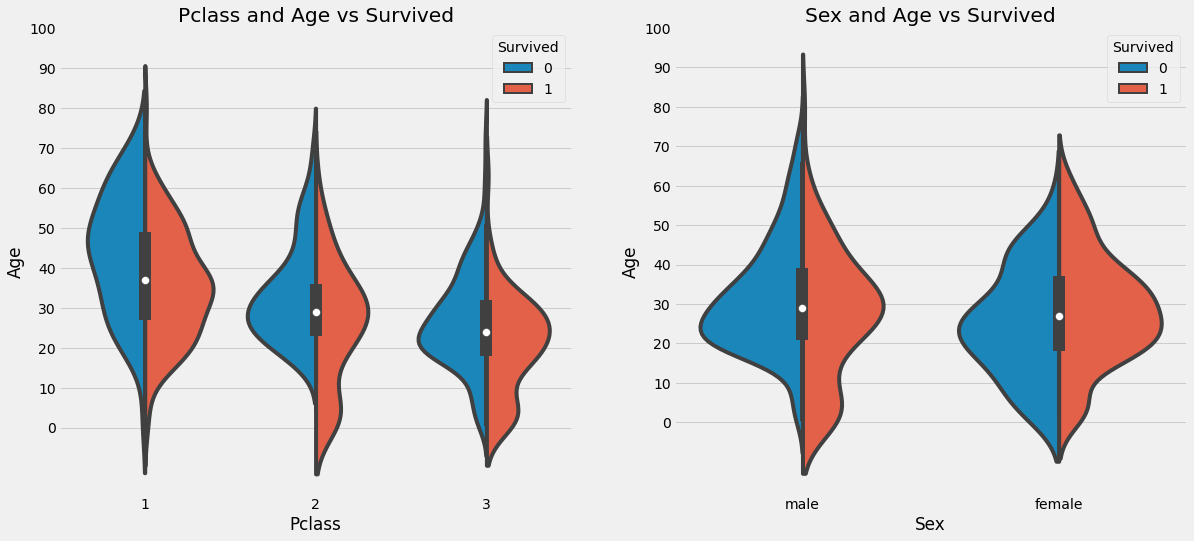

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sn.violinplot('Pclass','Age',hue='Survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sn.violinplot('Sex','Age',hue='Survived',data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [17]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.')#Extracting name initials
train_data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [18]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                             'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
train_data['Initial']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [21]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

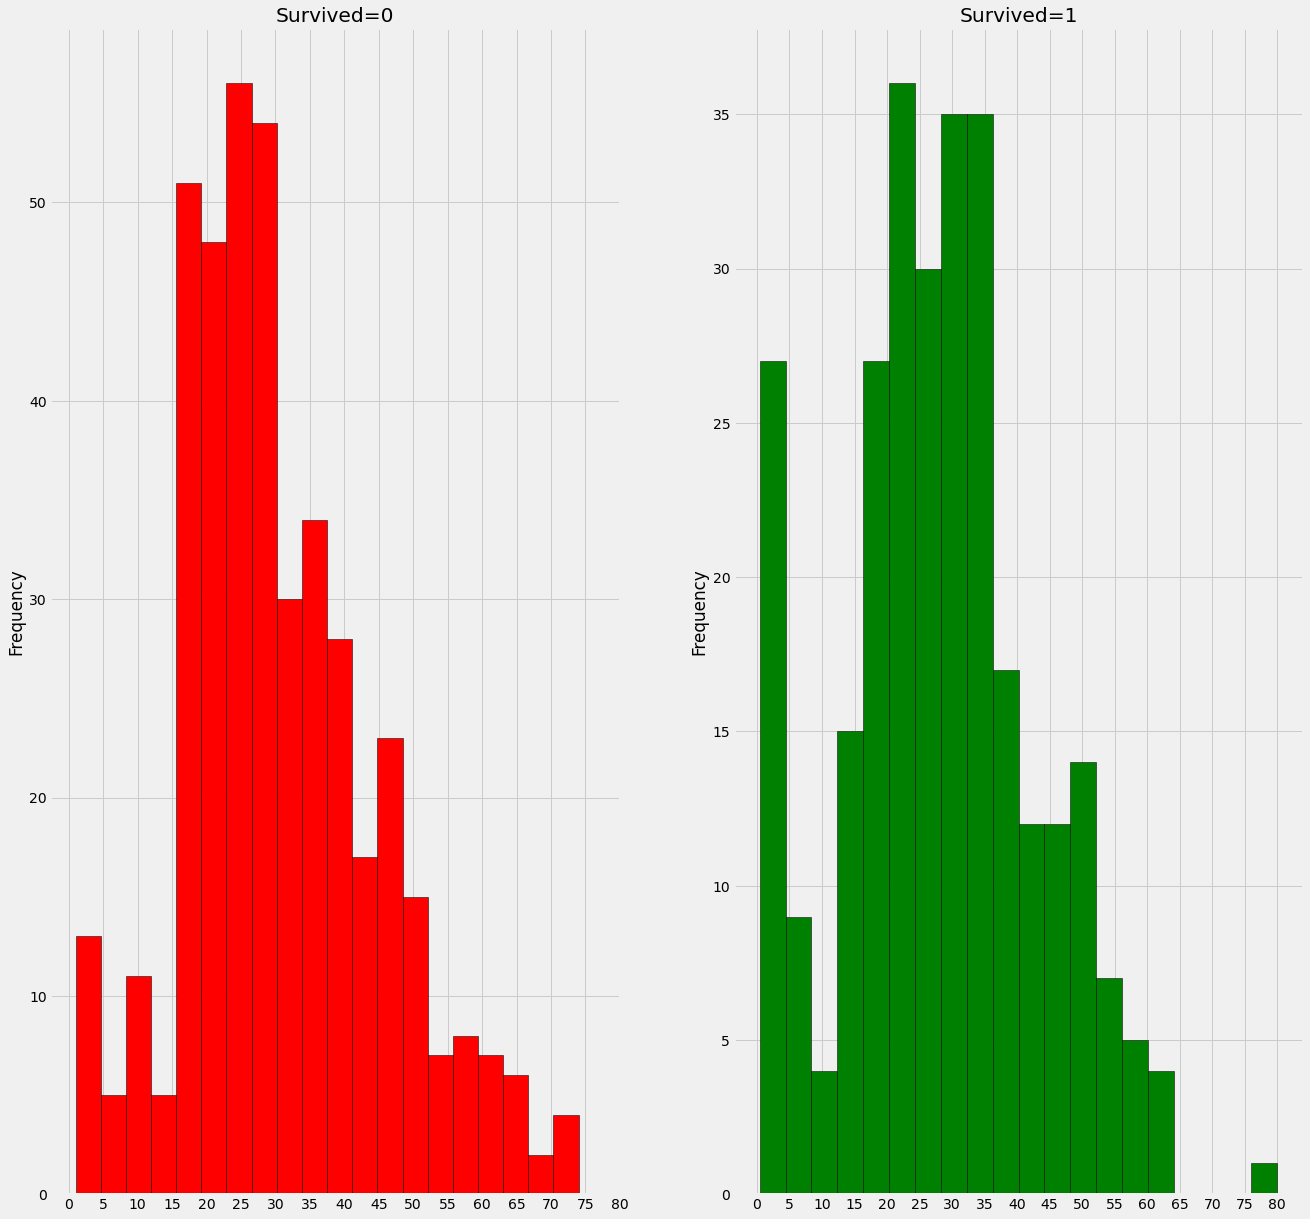

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived=1')
plt.show()

In [23]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46

In [24]:
train_data.Age.isnull().any()

False

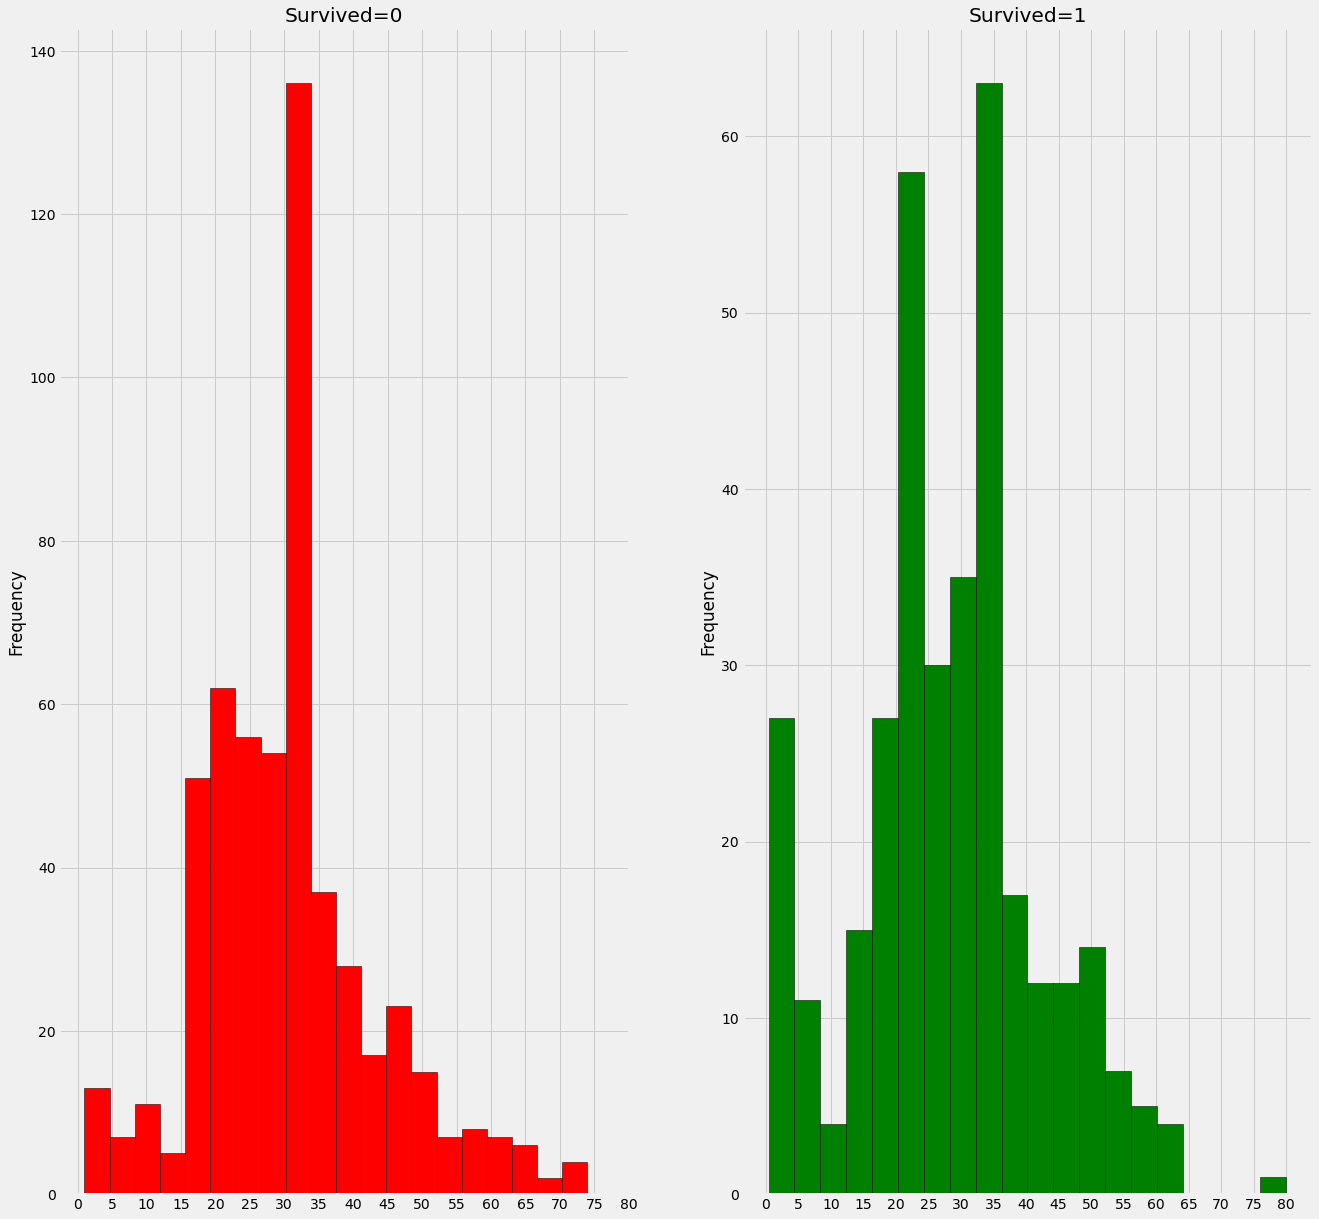

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived=1')
plt.show()

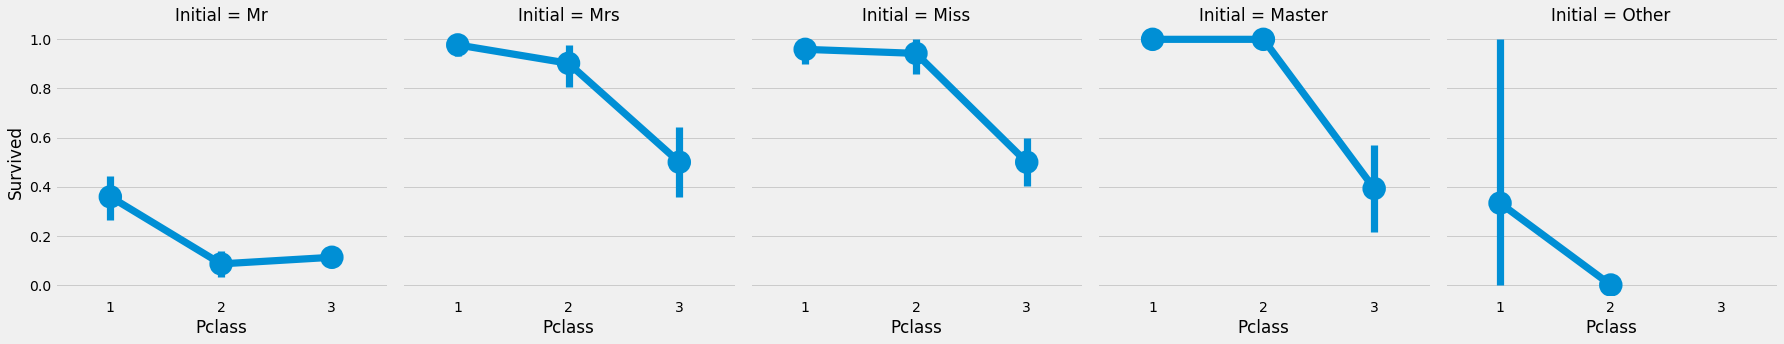

In [26]:
sn.factorplot('Pclass','Survived',col='Initial',data=train_data)
plt.show()

# Features SipSp

In [27]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [28]:
pd.crosstab([train_data.SibSp],train_data.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Testing

In [29]:
import random

train_data=train_data[(np.abs(stats.zscore(train_data['Age']))<3)]
alive=train_data[train_data['Survived']==1]['Age'] #store age of person whose income==1
dead=train_data[train_data['Survived']==0]['Age']

alive=alive.values.tolist()
alive=random.sample(alive,100)

dead=dead.values.tolist()
dead=random.sample(dead,100)

from scipy.stats import ttest_ind
ttest,pval=ttest_ind(alive,dead,equal_var=False)
print('ttest',ttest)
print('pvalue:',pval)

if pval<0.05:
    print('We reject null hypothesis')
else:
    print('We accept null hypothesis')

ttest -1.7551289154272662
pvalue: 0.08080555215307271
We accept null hypothesis


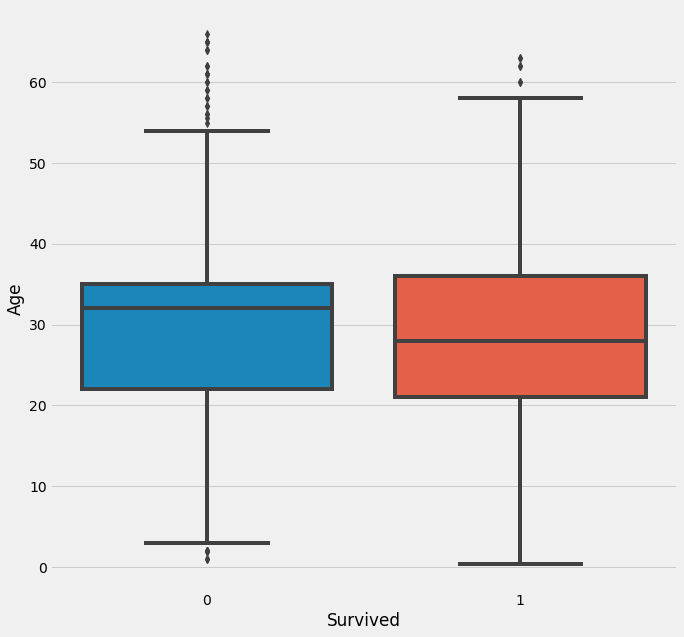

In [30]:
#Boxplot
fig=plt.figure(figsize=(10,10))
sn.boxplot(x='Survived',y='Age',data=train_data)
plt.show()

In [31]:
import random

train_data=train_data[(np.abs(stats.zscore(train_data['Pclass']))<3)]
alive=train_data[train_data['Survived']==1]['Pclass'] #store age of person whose income==1
dead=train_data[train_data['Survived']==0]['Pclass']

alive=alive.values.tolist()
alive=random.sample(alive,100)

dead=dead.values.tolist()
dead=random.sample(dead,100)

from scipy.stats import ttest_ind
ttest,pval=ttest_ind(alive,dead,equal_var=False)
print('ttest',ttest)
print('pvalue:',pval)

if pval<0.05:
    print('We reject null hypothesis')
else:
    print('We accept null hypothesis')

ttest -6.484932721765994
pvalue: 8.177180400828908e-10
We reject null hypothesis


In [32]:
import random

train_data=train_data[(np.abs(stats.zscore(train_data['SibSp']))<3)]
alive=train_data[train_data['Survived']==1]['SibSp'] #store age of person whose income==1
dead=train_data[train_data['Survived']==0]['SibSp']

alive=alive.values.tolist()
alive=random.sample(alive,100)

dead=dead.values.tolist()
dead=random.sample(dead,100)

from scipy.stats import ttest_ind
ttest,pval=ttest_ind(alive,dead,equal_var=False)
print('ttest',ttest)
print('pvalue:',pval)

if pval<0.05:
    print('We reject null hypothesis')
else:
    print('We accept null hypothesis')

ttest 1.170330505445214
pvalue: 0.24327599142140957
We accept null hypothesis


# Chi Square

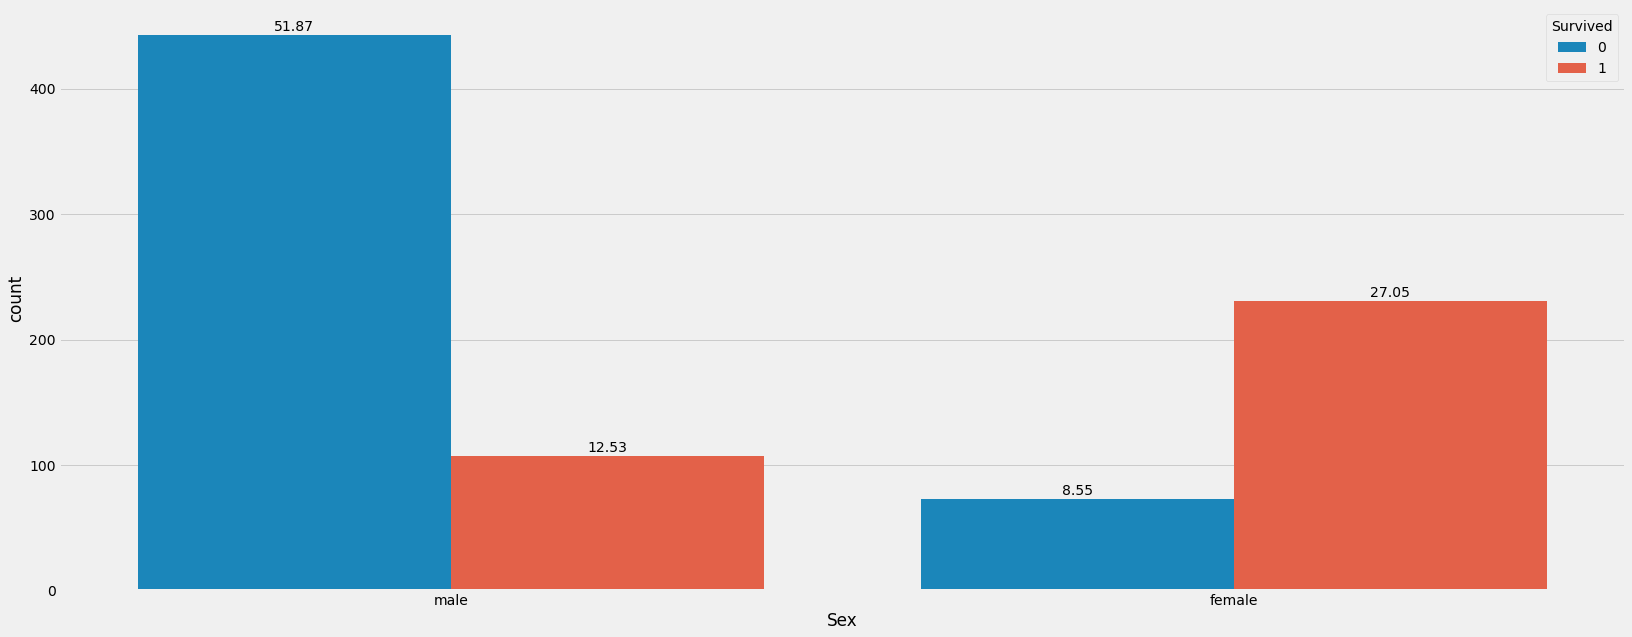

In [33]:
#Chi Square
plt.figure(figsize=(25,10))
total=float(len(train_data['Pclass']))

ax=sn.countplot(x='Sex',hue='Survived',data=train_data)#hue=K ko basis maa compare garne
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total)*100),
            ha='center')
plt.show()
    

In [34]:
#crosstab
c_t=pd.crosstab(train_data['Sex'].sample(frac=0.04,replace=True,random_state=1),train_data['Survived'].sample(frac=0.04,replace=True,random_state=1),margins=False)
c_t#0.04 frac vaneko sample vaneko 4% data

Survived,0,1
Sex,,
female,2,5
male,21,6


In [35]:
#Chi Sq
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stats,p,dof,expected=chi2_contingency(c_t)
print('dof:%d'%dof)#dof number of catogery - 1
print('pvalue',p)
print(expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print('probaility=%.3f,critical=%.3f,stats=%.3f'%(prob,critical,stats))
if abs(stats>=critical):
    print('Dependent(reject ho)')
else:
    print('Independet(accept Ho)')
    
#if accept Ho then workclass and income are independent so it can be removed 

dof:1
pvalue 0.04270627404746349
[[ 4.73529412  2.26470588]
 [18.26470588  8.73529412]]
probaility=0.950,critical=3.841,stats=4.107
Dependent(reject ho)


In [36]:
#crosstab
c_t=pd.crosstab(train_data['Initial'].sample(frac=0.04,replace=True,random_state=1),train_data['Survived'].sample(frac=0.04,replace=True,random_state=1),margins=False)
c_t#0.04 frac vaneko sample vaneko 4% data

Survived,0,1
Initial,,
Master,1,1
Miss,2,3
Mr,19,5
Mrs,0,2
Other,1,0


In [37]:
#Chi Sq
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stats,p,dof,expected=chi2_contingency(c_t)
print('dof:%d'%dof)#dof number of catogery - 1
print('pvalue',p)
print(expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print('probaility=%.3f,critical=%.3f,stats=%.3f'%(prob,critical,stats))
if abs(stats>=critical):
    print('Dependent(reject ho)')
else:
    print('Independet(accept Ho)')
    
#if accept Ho then workclass and income are independent so it can be removed 

dof:4
pvalue 0.08637015187066194
[[ 1.35294118  0.64705882]
 [ 3.38235294  1.61764706]
 [16.23529412  7.76470588]
 [ 1.35294118  0.64705882]
 [ 0.67647059  0.32352941]]
probaility=0.950,critical=9.488,stats=8.146
Independet(accept Ho)


In [45]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Initial
count,854,854,854,201,852,854
unique,854,2,673,145,3,5
top,"Braund, Mr. Owen Harris",male,1601,G6,S,Mr
freq,1,550,7,4,614,516


In [48]:
train_data['Embarked'].fillna('S',inplace=True)

In [49]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          653
Embarked         0
Initial          0
dtype: int64

In [50]:
#crosstab
c_t=pd.crosstab(train_data['Embarked'].sample(frac=0.04,replace=True,random_state=1),train_data['Survived'].sample(frac=0.04,replace=True,random_state=1),margins=False)
c_t#0.04 frac vaneko sample vaneko 4% data

Survived,0,1
Embarked,,
C,1,2
Q,2,0
S,20,9


In [51]:
#Chi Sq
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stats,p,dof,expected=chi2_contingency(c_t)
print('dof:%d'%dof)#dof number of catogery - 1
print('pvalue',p)
print(expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print('probaility=%.3f,critical=%.3f,stats=%.3f'%(prob,critical,stats))
if abs(stats>=critical):
    print('Dependent(reject ho)')
else:
    print('Independet(accept Ho)')
    
#if accept Ho then workclass and income are independent so it can be removed 

dof:2
pvalue 0.27341603377759777
[[ 2.02941176  0.97058824]
 [ 1.35294118  0.64705882]
 [19.61764706  9.38235294]]
probaility=0.950,critical=5.991,stats=2.594
Independet(accept Ho)


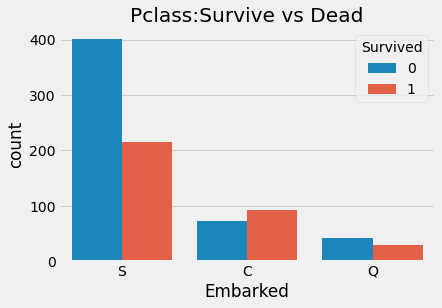

In [52]:
sn.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Pclass:Survive vs Dead')
plt.show()